In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import seaborn as sns

### Loading the dataset

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Datasets /Customer_Segmentation/bank.csv")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


### Preprocessing

Drop deposit column as it is not useful

In [4]:
X = df.drop(columns=['deposit'])

Convert categorical features using one-hot encoding

In [5]:
X_encoded = pd.get_dummies(X, drop_first=True)

 ### Standardize features

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

### Step 4: DBSCAN

In [7]:
dbscan = DBSCAN(eps=5.0, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

In above code I had tried ep values from 0.5,1.0 ...... 5.5, I find the 5.0 the best balance.

In [8]:
# Check new cluster distribution
import numpy as np
unique, counts = np.unique(clusters, return_counts=True)

for label, count in zip(unique, counts):
    print(f"Cluster {label}: {count} points")

Cluster -1: 470 points
Cluster 0: 7952 points
Cluster 1: 274 points
Cluster 2: 99 points
Cluster 3: 269 points
Cluster 4: 214 points
Cluster 5: 315 points
Cluster 6: 269 points
Cluster 7: 5 points
Cluster 8: 5 points
Cluster 9: 30 points
Cluster 10: 304 points
Cluster 11: 12 points
Cluster 12: 21 points
Cluster 13: 20 points
Cluster 14: 262 points
Cluster 15: 198 points
Cluster 16: 10 points
Cluster 17: 13 points
Cluster 18: 11 points
Cluster 19: 240 points
Cluster 20: 6 points
Cluster 21: 7 points
Cluster 22: 9 points
Cluster 23: 11 points
Cluster 24: 68 points
Cluster 25: 6 points
Cluster 26: 8 points
Cluster 27: 5 points
Cluster 28: 16 points
Cluster 29: 7 points
Cluster 30: 14 points
Cluster 31: 5 points
Cluster 32: 7 points


In [9]:
df['cluster'] = dbscan.labels_

###Lets make a excel sheet for clusters to interpret the clusters, segmentation, and tableau viz.

 1. Average Age per Cluster

In [10]:
avg_age = df.groupby('cluster')['age'].mean()

2. Job Type Counts per Cluster (Admin, Blue-Collar, etc.)

In [11]:
pd.crosstab(df['cluster'], df['job'])
job_percent = pd.crosstab(df['cluster'], df['job'], normalize='index') * 100

3. Marital Status (% Married, Single, Divorced)

In [12]:
marital_percent = pd.crosstab(df['cluster'], df['marital'], normalize='index') * 100

4. Education Level (% Primary, Secondary, Tertiary, Unknown)

In [13]:
education_percent = pd.crosstab(df['cluster'], df['education'], normalize='index') * 100

 5. Median Balance

In [14]:
median_balance = df.groupby('cluster')['balance'].median()

6. Average Duration

In [15]:
avg_duration = df.groupby('cluster')['duration'].mean()

7. Average Campaign

In [16]:
avg_campaign = df.groupby('cluster')['campaign'].mean()

8. Average Balance

In [17]:
avg_balance = df.groupby('cluster')['balance'].mean()

9. Most Common Contact Day

In [18]:
most_contact_day = df.groupby('cluster')['day'].agg(lambda x: x.mode()[0])

10. Most Contact Month

In [19]:
most_contact_month = df.groupby('cluster')['month'].agg(lambda x: x.mode()[0])

11. Contact Type % (cellular/tel)

In [20]:
contact_percent = pd.crosstab(df['cluster'], df['contact'], normalize='index') * 100

 Combine Everything

In [21]:
final_report = pd.DataFrame({
    'Average Age': avg_age,
    'Median Balance': median_balance,
    'Average Duration': avg_duration,
    'Average Campaign': avg_campaign,
    'Average Balance': avg_balance,
    'Most Contact Day': most_contact_day,
    'Most Contact Month': most_contact_month
})

# Merge job, marital, education, contact
final_report = pd.concat([
    final_report,
    job_percent,
    marital_percent,
    education_percent,
    contact_percent
], axis=1)

final_report.reset_index(inplace=True)  # Include ClusterID


Save as Excel

In [22]:
final_report.to_excel("DBSCAN_Clustering_Report.xlsx", index=False)

from google.colab import files
files.download("DBSCAN_Clustering_Report.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###Visualize the Clusters

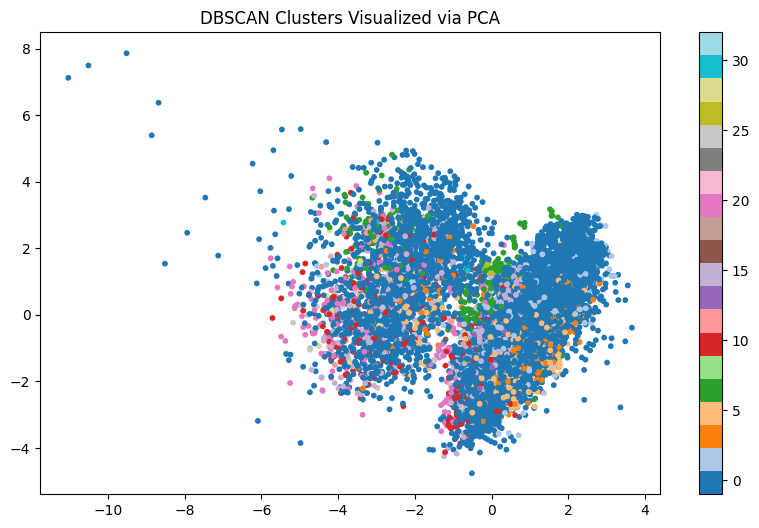

In [23]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
df['pca1'] = pca_result[:,0]
df['pca2'] = pca_result[:,1]

plt.figure(figsize=(10,6))
plt.scatter(df['pca1'], df['pca2'], c=df['cluster'], cmap='tab20', s=10)
plt.colorbar()
plt.title('DBSCAN Clusters Visualized via PCA')
plt.show()
